In [36]:
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set()

In [50]:
pheno={}
sets=['Train','Val','Test']
for folder in ['age','pancancer']:
    pheno[folder]={s:pd.read_csv('{}/{}_pheno.csv'.format(folder,s.lower()),index_col=0) for s in sets}

In [51]:
age_age=pd.concat([pheno['age'][k]['Age'] for k in sets],axis=1)
age_sex=pd.concat([pheno['age'][k]['Sex'] for k in sets],axis=1)
age_age.columns=sets
age_sex.columns=sets
age_demo=round(age_age.describe().T,2)
sex_demo = round(age_sex.describe().T,2)

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [58]:
pancancer_age=pd.concat([pheno['pancancer'][k]['age']/365. for k in sets],axis=1)
pancancer_sex=pd.concat([pheno['pancancer'][k]['Sex'] for k in sets],axis=1)
pancancer_disease=pd.concat([pheno['pancancer'][k]['disease'] for k in sets],axis=1)
pancancer_age.columns=sets
pancancer_sex.columns=sets
pancancer_disease.columns=sets

age_demo=round(pancancer_age.describe().T,2)
sex_demo = round(pancancer_sex.describe().T,2)
disease_demo = round(pancancer_disease.describe().T,2)


/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the curren

Text(0.5, 1.0, 'Distribution of Age Across Studies')

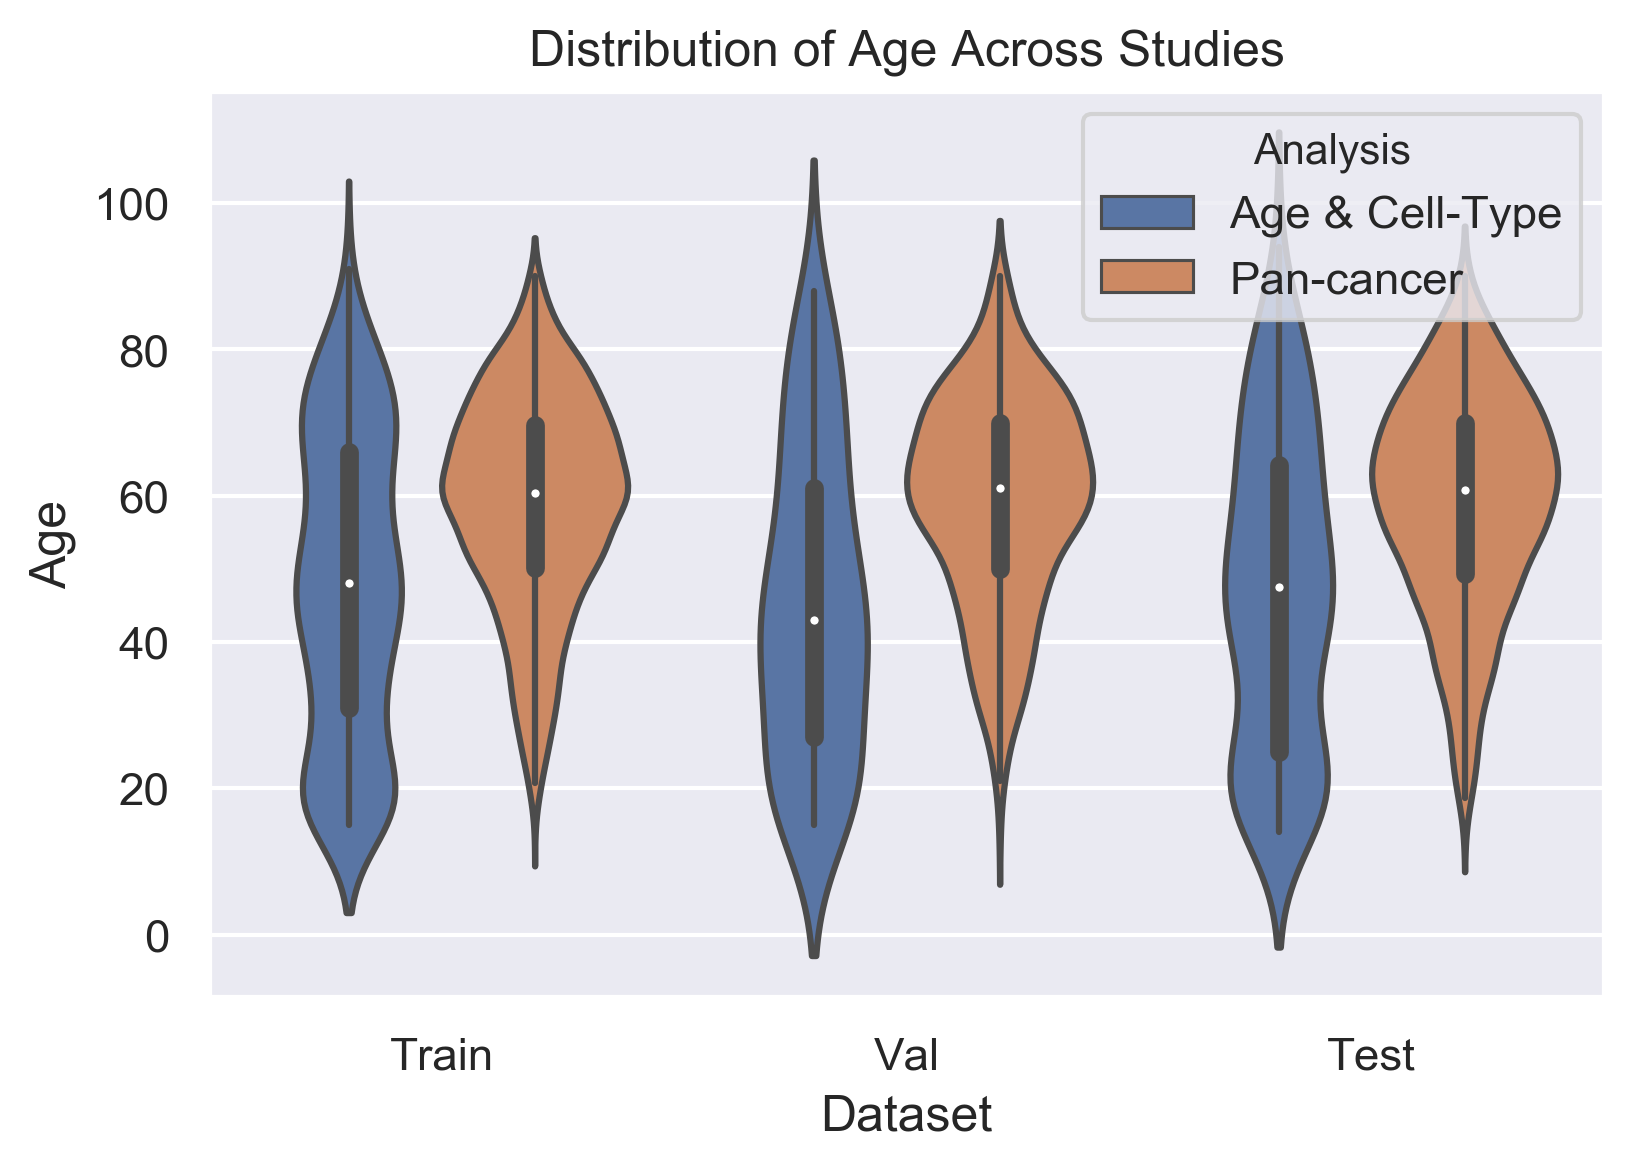

In [57]:
age_melt=pd.melt(age_age)
age_melt['Analysis']='Age & Cell-Type'
pancancer_melt=pd.melt(pancancer_age)
pancancer_melt['Analysis']='Pan-cancer'
sns.violinplot('variable','value',hue='Analysis',data=pd.concat([age_melt,pancancer_melt]))
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.title('Distribution of Age Across Studies')

In [65]:
pd.DataFrame([pancancer_disease[k].value_counts() for k in sets]).T.to_csv('counts_pancancer.csv')

In [71]:
mf_pancancer=pd.DataFrame([pancancer_sex[k].value_counts() for k in sets]).T.iloc[:2].astype(str)

In [74]:
mf_age=pd.DataFrame([age_sex[k].value_counts() for k in sets]).T.iloc[::-1].astype(str)
mf_age.index=['M','F']

In [79]:
sex_stats=pd.concat([mf_pancancer.loc['M']+":"+mf_pancancer.loc['F'],mf_age.loc['M']+":"+mf_age.loc['F']],axis=1).T
sex_stats.index=['Pan-Cancer','Age/Cell-Type']
sex_stats.to_csv('sex_stats.csv')